<table style="width:98%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            2D Diffusion Equation and Nelder Mead Optimization Algorithm for a single path
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="80%" height="80%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 1
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; 2D Diffusion Synthetic Field Generator Class
        </font>
    </td>
  </tr>
</table>

In [1]:
# http://rpdata.caltech.edu/courses/aph162/2007/Protocols/diffusion.pdf
import General_Functions as gf
import math
import sys
MyNum= sys.version_info[0]+sys.version_info[1]/10
gf.ThePrint_1Header_1Variable_Point1('Python Version =', MyNum)

ᐅ Python Version =       3.8


In [2]:
class MySimpleSyntheticFieldGeneratorClass:
    # Class Initial Field Parameters:
    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        # Create storage allocation for Variable and initial its values 
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax 
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime
        
    def PrintInputData(self):
        gf.ThePrint_2Header_2Variable_Point1('XfieldMin            =', self.XfieldMin,           '   XfieldMax=', self.XfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('YfieldMin            =', self.YfieldMin,           '   YfieldMax=', self.YfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)
        
    def PrintData(self):
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)

    def SetPollutionDeltaTime(self, DeltaTime):
        self.DeltaTime= DeltaTime

    def CalculateSyntheticField(self, Xrover, Yrover):
        SourceDistantFromRover= math.sqrt(math.pow(self.Xsource-Xrover,2)+math.pow(self.Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*self.MergeDiffusionTime))
        Denominator= 4.0*math.pi*self.MergeDiffusionTime
        Pollution  = self.Pollution*Numerator/Denominator
        return Pollution

    def CalculateEstimateField(self, Xrover, Yrover, Xsource, Ysource, MergeDiffusionTime, Pollution):
        SourceDistantFromRover= math.sqrt(math.pow(Xsource-Xrover,2)+math.pow(Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*MergeDiffusionTime))
        Denominator= 4.0*math.pi*MergeDiffusionTime
        Pollution  = Pollution*Numerator/Denominator
        return Pollution

    def ObjectiveFunction_Old(self, ObjectiveVector):
        SourceDistantFromRover= math.sqrt(math.pow(ObjectiveVector[2]-ObjectiveVector[0],2)+math.pow(ObjectiveVector[3]-ObjectiveVector[1],2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*ObjectiveVector[4]))
        Denominator= 4.0*math.pi*ObjectiveVector[4]
        Pollution  = ObjectiveVector[5]*Numerator/Denominator
        return Pollution


In [3]:
Mssfgc= MySimpleSyntheticFieldGeneratorClass(
    XfieldMin=0.0, XfieldMax=1000.0, YfieldMin=0.0, YfieldMax=1000.0, 
    Xsource=500.0, Ysource=500.0, DiffusionCoefficient=2.0, Pollution=1000.0, DeltaTime=800.0)
gf.ThePrint_1Header_Underline('Real Parameters')
Mssfgc.PrintData()

ᐅ  Real Parameters 
ᐅ Xsource              =     500.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 2
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; 1D Cross Section Pollution Distrebution 
        </font>
    </td>
  </tr>
</table>

In [4]:
# Importing Data Manipulation and Graphic visualization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Do not show stupid annoying matplotlib warnings :( I Don't Care !, Nobody Cares ! 
# https://www.youtube.com/watch?v=_bhJzXTf6KE&ab_channel=SuperorganismVEVO
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

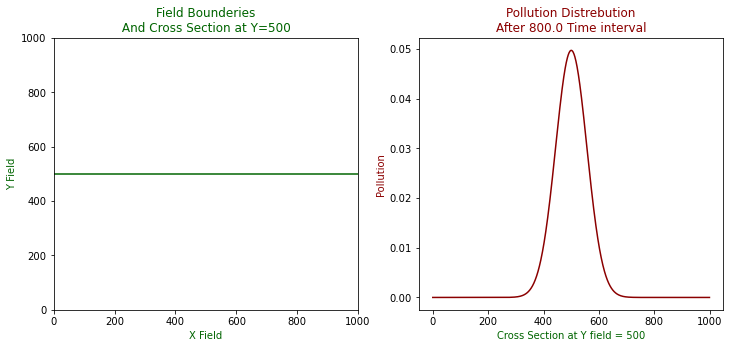

In [5]:
sns.set_color_codes()
fig, (ax1,ax2)= plt.subplots(ncols=2, nrows=1, figsize=(12,5))

My_x_cs= []
My_y_cs= []
for xxx in range(1000):
    My_x_cs.append(xxx)
    My_y_cs.append(500.0)

My_xx_cs = np.array(My_x_cs)
My_yy_cs = np.array(My_y_cs)

g=sns.lineplot(x=My_xx_cs, y=My_yy_cs, color="darkGreen", ax=ax1)
MyString= "Field Bounderies\n And Cross Section at Y=500 "
g.set_title(MyString, fontsize=12, color="darkgreen")
g.set_ylabel('Y Field', fontsize=10, color="darkgreen")
g.set_xlabel('X Field', fontsize=10, color="darkgreen")
g.set_xlim(0, 1000)
g.set_ylim(0, 1000)


My_Pollution = []
My_x= []
for xxx in range(1000):
    My_x.append(xxx)
    My_Pollution.append(Mssfgc.CalculateSyntheticField(xxx,500.0))

My_xx = np.array(My_x)
My_pp = np.array(My_Pollution)

g=sns.lineplot(x=My_xx, y=My_pp, color="darkred", ax=ax2)
MyString= "Pollution Distrebution\nAfter "+ str(Mssfgc.DeltaTime)+" Time interval"
g.set_title(MyString, fontsize=12, color="darkred")
g.set_ylabel('Pollution', fontsize=10, color="darkred")
g.set_xlabel('Cross Section at Y field = 500', fontsize=10, color="darkgreen")

plt.show()

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 3
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; Calculating Synthetic Field Pollution at Rover Position
        </font>
    </td>
  </tr>
</table>

In [6]:
GlobalXrover= 400.0
GlobalYrover= 500.0

In [7]:
MySampling= Mssfgc.CalculateSyntheticField(GlobalXrover,GlobalYrover)

gf.ThePrint_1Header_Underline('Rover Sampling')
gf.ThePrint_2Header_2Variable_Point1('XRover            =', GlobalXrover, '   YRover  =', GlobalYrover)
gf.ThePrint_1Header_1Variable('Rover Measurement =     ', MySampling )

ᐅ  Rover Sampling 
ᐅ XRover            =     400.0     YRover  =     500.0
ᐅ Rover Measurement =       0.010425215122951942


In [8]:
My_Rover_X = np.array([GlobalXrover])
My_Rover_Y = np.array([GlobalYrover])
My_Source_X= np.array([Mssfgc.Xsource])
My_Source_Y= np.array([Mssfgc.Ysource])

(0.0, 1000.0)

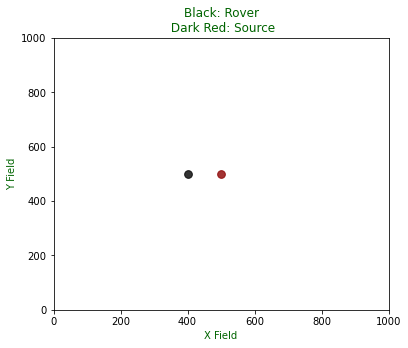

In [9]:
fig, ax1= plt.subplots(ncols=1, nrows=1, figsize=(6,5))

g=sns.regplot(x=My_Rover_X, y=My_Rover_Y, color="Black", scatter=True, fit_reg=False, marker='o', scatter_kws={"s": 60}, ax=ax1)
g=sns.regplot(x=My_Source_X, y=My_Source_X, color="darkRed", scatter=True, fit_reg=False, marker='o', scatter_kws={"s": 60}, ax=ax1)

MyString= "Black: Rover\n Dark Red: Source"
g.set_title(MyString, fontsize=12, color="darkgreen")
g.set_ylabel('Y Field', fontsize=10, color="darkgreen")
g.set_xlabel('X Field', fontsize=10, color="darkgreen")
g.set_xlim(0, 1000)
g.set_ylim(0, 1000)


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 4
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; Nelder Mead Optimization Algorithm for a Rundom Path
        </font>
    </td>
  </tr>
</table>

In [10]:
import scipy as sp
from scipy import optimize
import random
import General_Functions as gf
gf.ThePrint_1Header_1Variable('We have used scipy Version      :', '1.7.3')
gf.ThePrint_1Header_1Variable('In this system scipy Version is :', sp.__version__)

ᐅ We have used scipy Version      :  1.7.3
ᐅ In this system scipy Version is :  1.7.3


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Creating Rover Location Array
        </font>
    </td>
  </tr>
</table>

In [11]:
Global_Number_of_Samples   = 1
Global_X_Rover             = []
Global_Y_Rover             = []
Global_X_Rover.append(GlobalXrover)
Global_Y_Rover.append(GlobalYrover)
Global_Xsource             = []
Global_Ysource             = []
Global_Merge_Diffusion_Time= []
Global_Pollution           = []
Global_Displacement        = 20.0

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Objective Function, Parameters are:<br>
            &emsp; Estimate[0] : Xsource Location,<br>
            &emsp; Estimate[1] : Ysource Location,<br>
            &emsp; Estimate[2] : Merge of Diffusion Coefficient and Time (D*t),<br>
            &emsp; Estimate[3] : Initial Amount of Pollution.
        </font>
    </td>
  </tr>
</table>

In [12]:
def ObjectiveFunction_Old(Estimate):
    ErrorEstimationSum= 0.0
    for iii in range(Global_Number_of_Samples):

        # This is what the rover sampled at Xrover and Yrover location
        RealPollution               = Mssfgc.CalculateSyntheticField(Global_X_Rover[iii],Global_Y_Rover[iii])

        # This is what we estimate to perform Nelder-Mead Optimization Algorithm
        SourceDistantFromRover      = math.sqrt(math.pow(Estimate[0]-Global_X_Rover[iii],2)+math.pow(Estimate[1]-Global_Y_Rover[iii],2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator                   = math.exp(-SourceDistantFromRoverPower2/(4.0*Estimate[2]))
        Denominator                 = 4.0*math.pi*Estimate[2]
        EstimatePollution           = Estimate[3]*Numerator/Denominator
    
        ErrorEstimationSum          = math.sqrt(math.pow(Mssfgc.Pollution-RealPollution,2))+ErrorEstimationSum

    return ErrorEstimationSum

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Optimization Setup:<br>
            &emsp; Initial Guess for Objective Function Parameters,<br>
            &emsp; BoundedParametersValues for Objective Function Parameters.
        </font>
    </td>
  </tr>
</table>

In [13]:
InitialGuess           = [300.0, 300.0, 1.8*900.0, 700.0]
# Bounded Parameters      Xsource       Ysource       Merge           Pollution 
BoundedParametersValues= ((1.0, 999.0), (1.0, 999.0), (1200, 3000.0), (600.0, 1200.0))
MyResult               = optimize.minimize(ObjectiveFunction_Old, InitialGuess, method='nelder-mead', bounds=BoundedParametersValues)

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Nelder Mead Optimization Status and Evaluation.
        </font>
    </td>
  </tr>
</table>

In [14]:
gf.ThePrint_1Header_1Variable('Status           :', MyResult['message'])
gf.ThePrint_1Header_1Variable('Total Evaluations:', MyResult['nfev'])

ᐅ Status           :  Optimization terminated successfully.
ᐅ Total Evaluations:  125


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Nelder Mead Optimization Parameters.
        </font>
    </td>
  </tr>
</table>

In [15]:
MySolution = MyResult['x']
MyEvaluation = ObjectiveFunction_Old(MySolution)
gf.ThePrint_1Header_Underline('Real Parameters')
Mssfgc.PrintData()
gf.ThePrint_1Header_Underline('Optimization Parameters')
gf.ThePrint_2Header_2Variable_Point1('Xsource              =', MySolution[0], '   Ysource  =', MySolution[1])
gf.ThePrint_2Header_2Variable_Point1('Merge Diffusion Time =', MySolution[2], '   Pollution=', MySolution[3])
gf.ThePrint_1Header_1Variable_Exponent2('Evaluation           =', MyEvaluation)

Global_Xsource.append(MySolution[0])
Global_Ysource.append(MySolution[1])
Global_Merge_Diffusion_Time.append(MySolution[2])
Global_Pollution.append(MySolution[3])

ᐅ  Real Parameters 
ᐅ Xsource              =     500.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0
ᐅ  Optimization Parameters 
ᐅ Xsource              =     300.0     Ysource  =     300.0
ᐅ Merge Diffusion Time =    1620.0     Pollution=     700.0
ᐅ Evaluation           =  1.00e+03


<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; First Iteration:<br>
            &emsp; Moving the Rover to rundom (-dX or dX or -dY or dY) Location,<br>
            &emsp; Predicting Pollution with Previous Optimized Parameters,<br>
            &emsp; Sampling Field (Real Pollution) at new Location,<br>
            &emsp; Calculating Difference of Real Pollution from Predicted Pollution.
        </font>
    </td>
  </tr>
</table>

In [16]:
def NewRoverLocation_Old():
    global Global_Number_of_Samples
    # Get Old Location:
    GXR= Global_X_Rover[Global_Number_of_Samples-1]
    GYR= Global_X_Rover[Global_Number_of_Samples-1]
    # Increase Number Of Sample
    Global_Number_of_Samples = Global_Number_of_Samples+1
    iii= random.randint(1,4)
    if iii==1:
        Global_X_Rover.append(GXR-Global_Displacement)
        Global_Y_Rover.append(GYR)            
    elif iii==2:
        Global_X_Rover.append(GXR+Global_Displacement)
        Global_Y_Rover.append(GYR)            
    elif iii==3:
        Global_X_Rover.append(GXR)
        Global_Y_Rover.append(GYR-Global_Displacement)            
    elif iii==4:
        Global_X_Rover.append(GXR)
        Global_Y_Rover.append(GYR+Global_Displacement)            

In [17]:
NewRoverLocation_Old()
Global_Xsource.append(MySolution[0])
Global_Ysource.append(MySolution[1])
Global_Merge_Diffusion_Time.append(MySolution[2])
Global_Pollution.append(MySolution[3])
Real_New_Location_Pollution= Mssfgc.CalculateSyntheticField(Global_X_Rover[Global_Number_of_Samples-1],Global_Y_Rover[Global_Number_of_Samples-1])



In [18]:
def PredictPollution(MyXsource, MyYsource):
    # This is what the rover sampled on the Xrover,Yrover location
    RealPollution               = Mssfgc.CalculateSyntheticField(GlobalXrover,GlobalYrover)

    # this is what we estimate to perform Nelder-Mead Optimization Algorithm
    # Estimate[0] : Xsource Location
    # Estimate[1] : Ysource Location
    # Estimate[2] : Diffusion Coefficient
    # Estimate[3] : The time elapsed since the beginning of the contamination incident 
    # Estimate[4] : Initial amount of pollution
    SourceDistantFromRover      = math.sqrt(math.pow(Estimate[0]-GlobalXrover,2)+math.pow(Estimate[1]-GlobalYrover,2))
    SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
    Numerator                   = math.exp(-SourceDistantFromRoverPower2/(4.0*Estimate[2]))
    Denominator                 = 4.0*math.pi*Estimate[2]
    EstimatePollution           = Estimate[3]*Numerator/Denominator
    
    gf.ThePrint_1Header_Underline('Real vs Estimate Pollution')
    gf.ThePrint_1Header_1Variable('Real Pollution      =', RealPollution)
    gf.ThePrint_1Header_1Variable('Estimate Pollution  =', EstimatePollution)
    return

EstimateAfterOptimization= [500.0, 500.0, 999.0, 1.0]
RealVsEstimatePollution(EstimateAfterOptimization)

NameError: name 'RealVsEstimatePollution' is not defined

In [ ]:
NewRoverLocation_Old()
Global_X_Rover

In [ ]:
sdfg

In [ ]:
def RealVsEstimatePollution(Estimate):
    # This is what the rover sampled on the Xrover,Yrover location
    RealPollution               = Mssfgc.CalculateSyntheticField(GlobalXrover,GlobalYrover)

    # this is what we estimate to perform Nelder-Mead Optimization Algorithm
    # Estimate[0] : Xsource Location
    # Estimate[1] : Ysource Location
    # Estimate[2] : Diffusion Coefficient
    # Estimate[3] : The time elapsed since the beginning of the contamination incident 
    # Estimate[4] : Initial amount of pollution
    SourceDistantFromRover      = math.sqrt(math.pow(Estimate[0]-GlobalXrover,2)+math.pow(Estimate[1]-GlobalYrover,2))
    SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
    Numerator                   = math.exp(-SourceDistantFromRoverPower2/(4.0*Estimate[2]))
    Denominator                 = 4.0*math.pi*Estimate[2]
    EstimatePollution           = Estimate[3]*Numerator/Denominator
    
    gf.ThePrint_1Header_Underline('Real vs Estimate Pollution')
    gf.ThePrint_1Header_1Variable('Real Pollution      =', RealPollution)
    gf.ThePrint_1Header_1Variable('Estimate Pollution  =', EstimatePollution)
    return

EstimateAfterOptimization= [500.0, 500.0, 999.0, 1.0]
RealVsEstimatePollution(EstimateAfterOptimization)

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 5
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; Nelder Mead Optimization Algorithm for a Rundom Path
        <br>&#x1405; </font>
        <font style="font-weight: bold;font-family:Trebuchet MS, sans-serif; color:#0000A0;">${\small x^2+y^2}$</font>
        </font>
    </td>
  </tr>
</table>

<table style="width:100%">
  <tr style="background-color:#FFFF88">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; First Iteration:<br>
            &emsp; Moving the Rover to rundom (-dX or dX or -dY or dY) Location,<br>
            &emsp; Predicting Pollution with Previous Optimized Parameters,<br>
            &emsp; Sampling Field (Real Pollution) at new Location,<br>
            &emsp; Calculating Difference of Real Pollution from Predicted Pollution.
        </font>
    </td>
  </tr>
</table>

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fnc(x,p1,p2,p3):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


class CallbackFunctor:
    def __init__(self, obj_fun):
        self.num_calls = 0
        if self.num_calls == 0:
            print('Optimization problem started')
        self.obj_fun = obj_fun
    
    def __call__(self, x):
        fun_val = self.obj_fun(x,p1,p2,p3)
        self.num_calls += 1
        if self.num_calls % 5 == 0:
            print('Work in progress...')
            print(p1)
            print(p2)
            print(p3)
            print(x)
            
cb = CallbackFunctor(objective_fnc)

# Parameters
p1=10
p2=20
p3=30
param=(p1,p2,p3)
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(objective_fnc, x0, args=(p1,p2,p3), method='nelder-mead', callback=cb, options={'xatol': 1e-8, 'disp': True})

print(res.x)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fnc(x,a,b):
    """The Rosenbrock function"""
    f= math.pow(a-x[0],2)+b*math.pow(x[1]-math.pow(x[0],2),2)
    return (f)


class CallbackFunctor:
    def __init__(self, obj_fun):
        self.num_calls = 0
        if self.num_calls == 0:
            print('Optimization problem started')
        self.obj_fun = obj_fun
    
    def __call__(self, x):
        fun_val = self.obj_fun(x,a,b)
        self.num_calls += 1
        if self.num_calls % 5 == 0:
            print('Work in progress...')
            print(a)
            print(b)
            print(x)
            
cb = CallbackFunctor(objective_fnc)

# Parameters
a=1
b=100
x0 = np.array([1.3, 0.7])
res = minimize(objective_fnc, x0, args=(a,b), method='nelder-mead', callback=cb, options={'xatol': 1e-8, 'disp': True})

print(res.x)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fnc(x,a,b):
    """The Rosenbrock function"""
    f= math.pow(a-x[0],2)+b*math.pow(x[1]-math.pow(x[0],2),2)
    return (f)

# Parameters
a=6
b=100
x0 = np.array([1.3, 0.7])
res = minimize(objective_fnc, x0, args=(a,b), method='nelder-mead')

print(res.x)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fnc(x,a):
    """The Rosenbrock function"""
    f= math.pow(a[0]-x[0],2)+a[1]*math.pow(x[1]-math.pow(x[0],2),2)
    return (f)

# Parameters
a  = np.array([6.0, 100.0])
x0 = np.array([1.3, 0.7])
res= minimize(objective_fnc, x0, args=(a), method='nelder-mead')

print(res.x)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_fnc(x,a):
    """The Rosenbrock function"""
    f= math.pow(a[0]-x[0],2)+a[1]*math.pow(x[1]-math.pow(x[0],2),2)
    return (f)

# Parameters
a= []
a.append(6.0)
a.append(100.0)
x0 = np.array([1.3, 0.7])
res= minimize(objective_fnc, x0, args=(a), method='nelder-mead')

print(res.x)

In [ ]:
arr = [[]*2]
#arr.append(1,6)
#arr.append(2,7)
#arr.append(3,8)
print(arr)

In [ ]:
arr=[]
col= []
col.append(1)
col.append(2)
arr.append(col)
col= []
col.append(6)
col.append(7)
arr.append(col)

print(arr)

In [ ]:
arr=[]
arr.append(2)
arr.append(3)

print(arr)

In [ ]:
def TowDimentionList_Test(TheArray, Xvalue, Yvalue):
    col= []
    col.append(Xvalue)
    col.append(Yvalue)
    TheArray.append(col)
    return(TheArray)
    
ZZ= []
ZZ= TowDimentionList_Test(ZZ, 1, 1)
ZZ= TowDimentionList_Test(ZZ, 2, 7)
ZZ= TowDimentionList_Test(ZZ, 3, 11)
ZZ= TowDimentionList_Test(ZZ, 6, 17)

print(len(ZZ))
print(ZZ)
print(ZZ[3][1])

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:2.0vw;font-weight: bold;text-decoration: underline;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        Section 6
        </font>
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        <br>&#x1405; Synthetic 2D Diffusion Field Generator 
        </font>
    </td>
  </tr>
</table>

<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; MySimpleFieldParameters Class<br> 
            &emsp;Parent class contains all field data structure parameters for</font>
        <font style="font-weight: bold;font-family:Trebuchet MS, sans-serif; color:#0000A0;">${\small P(r,t)= P(0,0)\frac{e^{\left(\frac{-r^2}{4Dt}\right)}}{4 \pi Dt}} $</font>:<br>
            <table style="border-collapse: collapse; margin-left: 0; 
  margin-right: auto;">
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;text-decoration:underline;">Varible</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;text-decoration:underline;">Symbols</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;text-decoration:underline;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Description</td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">XfieldMin, XfieldMax, YfieldMin, YfieldMax</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;"></td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Field boundaries</td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Xsource, Ysource</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;"></td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Source location</td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">DiffusionCoefficient</td>
                  <td style="text-align:left; font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">${\small D}$</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Diffusion Coefficient</td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Pollution</td>
                  <td style="text-align:left; font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">${\small P(0,0)}$</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Source Pollution</td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">DeltaTime</td>
                  <td style="text-align:left; font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">${\small t}$</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Time interval from pollution appearance</td>
              </tr>
              <tr style="background-color:#FFFF99">
                <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">MergeDiffusionTime</td>
                  <td style="text-align:left; font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">${\small D \cdot t}$</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;"></td>
              </tr>
              <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;text-decoration:underline;">Method</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;text-decoration:underline;"></td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;text-decoration:underline;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Description</td>
              </tr>
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">ChangeFieldParameters<td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Change Field Parameters values<td>
              </tr>
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">ChangePollutionDeltaTime<td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Change Pollution DeltaTime value<td>
              </tr>
            </table>
        </font>
    </td>
  </tr>
</table>

In [19]:
class MySimpleFieldParameters:

    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        # Create storage allocation for Variable and initial its values 
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax 
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime

    def ChangeFieldParameters(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax 
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime

    def ChangePollutionDeltaTime(self, DeltaTime):
        self.DeltaTime= DeltaTime


<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; MySimpleSyntheticFieldGeneratorClass_ForMeinFlow class<br> 
            &emsp;Child class of MySimpleFieldParameters, contains data methods:<br>
            <table style="border-collapse: collapse; margin-left: 0; 
  margin-right: auto;">
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;text-decoration:underline;">Method</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;text-decoration:underline;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Description</td>
              </tr>
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">PrintInputData</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Print all Input Parameters</td>
              </tr>
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">PrintData</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">Print Main Parameters</td>
              </tr>
               <tr style="background-color:#FFFF99">
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">CalculateSyntheticField</td>
                  <td style="text-align:left; font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0; padding-top:0; padding-bottom:0;">
Calculate the Synthetic Field using 2D Diffusion Solution
                  </td>
              </tr>
            </table>
        </font>
    </td>
  </tr>
</table>

In [20]:
class MySimpleSyntheticFieldGeneratorClass_ForMeinFlow(MySimpleFieldParameters):
    # Used
    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        super().__init__(XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                       Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime)        

    def PrintInputData(self):
        gf.ThePrint_2Header_2Variable_Point1('XfieldMin            =', self.XfieldMin,           '   XfieldMax=', self.XfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('YfieldMin            =', self.YfieldMin,           '   YfieldMax=', self.YfieldMax)
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)
        
    # Used
    def PrintData(self):
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', self.Xsource,             '   Ysource  =', self.Ysource)
        gf.ThePrint_2Header_2Variable_Point1('Diffusion Coefficient=', self.DiffusionCoefficient,'   Pollution=', self.Pollution)
        gf.ThePrint_1Header_1Variable_Point1('Pollution Delta Time =', self.DeltaTime)
        gf.ThePrint_1Header_1Variable_Point1('Merge Diffusion Time =', self.MergeDiffusionTime)

    # Used
    def CalculateSyntheticField(self, Xrover, Yrover):
        SourceDistantFromRover= math.sqrt(math.pow(self.Xsource-Xrover,2)+math.pow(self.Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*self.MergeDiffusionTime))
        Denominator= 4.0*math.pi*self.MergeDiffusionTime
        Pollution  = self.Pollution*Numerator/Denominator
        return Pollution
    
    # Used
    def PredictionBasedOnPreviusOptimization(self, Xrover, Yrover, Xsource, Ysource, MergeDiffusionTime, Pollution):
        SourceDistantFromRover= math.sqrt(math.pow(Xsource-Xrover,2)+math.pow(Ysource-Yrover,2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator  = math.exp(-SourceDistantFromRoverPower2/(4.0*MergeDiffusionTime))
        Denominator= 4.0*math.pi*MergeDiffusionTime
        Pollution  = Pollution*Numerator/Denominator
        return Pollution


<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Objective Function, Parameters are:<br>
            &emsp; Estimate[0] : Xsource Location,<br>
            &emsp; Estimate[1] : Ysource Location,<br>
            &emsp; Estimate[2] : Merge of Diffusion Coefficient and Time (D*t),<br>
            &emsp; Estimate[3] : Initial Amount of Pollution.
        </font>
    </td>
  </tr>
</table>

In [21]:
def ObjectiveFunction(Estimate, XXRover, YYRover, MeasurementIndex, SyntheticClass):
    ErrorEstimationSum= 0.0
    for iii in range(MeasurementIndex):

        # This is what the rover sampled at Xrover and Yrover location
        RealPollution               = SyntheticClass.CalculateSyntheticField(XXRover[iii],YYRover[iii])

        # This is what we estimate to perform Nelder-Mead Optimization Algorithm
        SourceDistantFromRover      = math.sqrt(math.pow(Estimate[0]-XXRover[iii],2)+math.pow(Estimate[1]-YYRover[iii],2))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator                   = math.exp(-SourceDistantFromRoverPower2/(4.0*Estimate[2]))
        Denominator                 = 4.0*math.pi*Estimate[2]
        EstimatePollution           = Estimate[3]*Numerator/Denominator
    
        ErrorEstimationSum          = math.sqrt(math.pow(EstimatePollution-RealPollution,2))+ErrorEstimationSum

    return (ErrorEstimationSum/MeasurementIndex)

<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Moving the Rover Location Randomly Function, Inputs are:<br>
            &emsp; Xrover : Current X Rover Location,<br>
            &emsp; Yrover : Current Y Rover Location,<br>
            &emsp; XYdisplacement : Displacement <br>
        &#x1405; Returns New X and Y Rover locations<br>
        </font>
    </td>
  </tr>
</table>

In [22]:
def MoveRoverLocationRandomly(Xrover, Yrover, XYdisplacement):
    iii= random.randint(1,4)
    if iii==1:
        New_Xrover= Xrover-XYdisplacement
        New_Yrover= Yrover
    elif iii==2:
        New_Xrover= Xrover+XYdisplacement
        New_Yrover= Yrover
    elif iii==3:
        New_Xrover= Xrover
        New_Yrover= Yrover-XYdisplacement
    elif iii==4:
        New_Xrover= Xrover
        New_Yrover= Yrover+XYdisplacement
    return(New_Xrover,New_Yrover)

<table style="width:100%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFF99">
    <td style="text-align:left">
        <font style="font-size:1.8vw;font-weight: bold;font-family:Trebuchet MS, sans-serif;color:#0000A0;">
        &#x1405; Tow Dimention (x,y) List Function, Inputs are:<br>
            &emsp; TheArray : Array to append data,<br>
            &emsp; Xvalue : The x data,<br>
            &emsp; Yvalue : The y data<br>
        &#x1405; Returns updated List array<br>
        </font>
    </td>
  </tr>
</table>

In [23]:
def SimulationsData(TheArray, SimulationIndex, 
                    XfieldMin, XfieldMax, YfieldMin, YfieldMax,
                    Xsource, Ysource, InitialPollution, DiffusionCoefficient, DeltaTime):
    col= []
    col.append(SimulationIndex)
    col.append(XfieldMin)
    col.append(XfieldMax)
    col.append(YfieldMin)
    col.append(YfieldMax)
    col.append(Xsource)
    col.append(Ysource)
    col.append(InitialPollution)
    col.append(DiffusionCoefficient)
    col.append(DeltaTime)
    MergeDiffusionTime= DiffusionCoefficient*DeltaTime
    col.append(MergeDiffusionTime)
    TheArray.append(col)
    return(TheArray)

def SimulationsData(TheArray, SimulationIndex, MeasurementIndex, 
                  Xrover, Yrover, Xsource, Ysource,
                  MergeDiffusionTime, InitialPollution, Displacement,
                  PredictionMeasurement, RealMeasurement, Reward):
    col= []
    col.append(SimulationIndex)
    col.append(MeasurementIndex)
    col.append(Xrover)
    col.append(Yrover)
    col.append(Xsource)
    col.append(Ysource)
    col.append(MergeDiffusionTime)
    col.append(InitialPollution)
    col.append(Displacement)
    col.append(PredictionMeasurement)
    col.append(RealMeasurement)
    col.append(Reward)
    TheArray.append(col)
    return(TheArray)

In [24]:
def MyMainFlow(PrintMore):
    # Initial position of Rover
    Xrover= 400
    Yrover= 500
    
    # History  of Rover positions, Estimation Source locations and 
    Measurement_Index   = 1
    XX_Rover            = []
    YY_Rover            = []
    XX_Rover.append(Xrover)
    YY_Rover.append(Yrover)
    Xsource             = []
    Ysource             = []
    Merge_Diffusion_Time= []
    Pollution           = []
    Displacement        = 20.0
    Prediction          = []
    Reward              = []
    
    # Creating a synthetic Field 
    SyntheticField= MySimpleSyntheticFieldGeneratorClass_ForMeinFlow(
        XfieldMin=0.0, XfieldMax=1000.0, YfieldMin=0.0, YfieldMax=1000.0, 
        Xsource=500.0, Ysource=500.0, DiffusionCoefficient=2.0, Pollution=1000.0, DeltaTime=800.0)
    gf.ThePrint_1Header_Underline('Real Field Parameters')
    SyntheticField.PrintData()    

    
    #### First Iteration
    print(" ")
    # Measurement of the rover Pollution.
    MySampling= SyntheticField.CalculateSyntheticField(XX_Rover[Measurement_Index-1],YY_Rover[Measurement_Index-1])
    gf.ThePrint_1Header_Underline('Rover\'s Measuring at initial location')
    gf.ThePrint_2Header_2Variable_Point1('XRover               =', XX_Rover[Measurement_Index-1], '   YRover   =', YY_Rover[Measurement_Index-1])
    gf.ThePrint_1Header_1Variable('Pollution Measurement=     ', MySampling )
    print(" ")
    # Initial Optimization
    InitialGuess           = [300.0, 300.0, 1.8*900.0, 700.0]
    # Bounded Parameters      Xsource       Ysource       Merge           Pollution 
    BoundedParametersValues= ((1.0, 999.0), (1.0, 999.0), (1200, 3000.0), (600.0, 1200.0))
    MyResult               = optimize.minimize(ObjectiveFunction, InitialGuess, args=(XX_Rover, YY_Rover, Measurement_Index, SyntheticField), method='nelder-mead', bounds=BoundedParametersValues)    
    gf.ThePrint_1Header_1Variable_Underline('Optimization Results for Iteation number :', Measurement_Index)
    if PrintMore==1:
        gf.ThePrint_1Header_1Variable('Status               :', MyResult['message'])
        gf.ThePrint_1Header_1Variable('Total Evaluations    :   ', MyResult['nfev'])    
    MySolution = MyResult['x']
    gf.ThePrint_2Header_2Variable_Point1('Xsource              =', MySolution[0], '   Ysource  =', MySolution[1])
    gf.ThePrint_2Header_2Variable_Point1('Merge Diffusion Time =', MySolution[2], '   Pollution=', MySolution[3])

    '''Xsource
    Ysource
    Merge_Diffusion_Time
    Pollution'''
    
    for iii in range(0,20):
        #### Next Iteration
        # Move the Rover to a new location Randomly
        (XX, YY)= MoveRoverLocationRandomly(XX_Rover[Measurement_Index-1], YY_Rover[Measurement_Index-1], Displacement)
        # Make a prediction based on previus optimization
        Prediction.append(SyntheticField.PredictionBasedOnPreviusOptimization(XX, YY, MySolution[0], MySolution[1], MySolution[2], MySolution[3]))
        # Append New Rover Location and Increase Measurement Index
        XX_Rover.append(XX)
        YY_Rover.append(YY)
        Measurement_Index     += 1
        print(" ")
        # Next Optimization based on previus optimization results
        InitialGuess           = [MySolution[0], MySolution[1], MySolution[2], MySolution[3]]
        # Bounded Parameters      Xsource       Ysource       Merge           Pollution 
        BoundedParametersValues= ((1.0, 999.0), (1.0, 999.0), (1200, 3000.0), (600.0, 1200.0))
        MyResult               = optimize.minimize(ObjectiveFunction, InitialGuess, args=(XX_Rover, YY_Rover, Measurement_Index, SyntheticField), method='nelder-mead', bounds=BoundedParametersValues)    
        gf.ThePrint_1Header_1Variable_Underline('Optimization Results for Iteation number :', Measurement_Index)
        if PrintMore==1:
            gf.ThePrint_1Header_1Variable('Status               :', MyResult['message'])
            gf.ThePrint_1Header_1Variable('Total Evaluations    :   ', MyResult['nfev'])    
        MySolution = MyResult['x']
        gf.ThePrint_2Header_2Variable_Point1('Xsource              =', MySolution[0], '   Ysource  =', MySolution[1])
        gf.ThePrint_2Header_2Variable_Point1('Merge Diffusion Time =', MySolution[2], '   Pollution=', MySolution[3])
        RealMeasurement= SyntheticField.CalculateSyntheticField(XX_Rover[Measurement_Index-1],YY_Rover[Measurement_Index-1])
        gf.ThePrint_1Header_1Variable('reward               =     ', RealMeasurement-Prediction[Measurement_Index-2])


    

In [25]:
MyMainFlow(0)

ᐅ  Real Field Parameters 
ᐅ Xsource              =     500.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0
 
ᐅ  Rover's Measuring at initial location 
ᐅ XRover               =     400.0     YRover   =     500.0
ᐅ Pollution Measurement=       0.010425215122951942
 
ᐅ  Optimization Results for Iteation number :  1
ᐅ Xsource              =     339.4     Ysource  =     445.0
ᐅ Merge Diffusion Time =    1914.5     Pollution=     601.1
 
ᐅ  Optimization Results for Iteation number :  2
ᐅ Xsource              =     316.5     Ysource  =     496.4
ᐅ Merge Diffusion Time =    2182.0     Pollution=     636.0
ᐅ reward               =       0.0023689889839548896
 
ᐅ  Optimization Results for Iteation number :  3
ᐅ Xsource              =     319.2     Ysource  =     491.5
ᐅ Merge Diffusion Time =    2978.8     Pollution=     678.9
ᐅ reward               =       0.010806928696911548
 
ᐅ  Optim